In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from skimage.feature import canny
from skimage.filters import threshold_otsu,sobel
from sklearn.base import TransformerMixin
from skimage import measure
import scipy.ndimage as ndi
from skimage.feature import corner_harris, corner_subpix, corner_peaks, CENSURE
from sklearn.pipeline import make_pipeline,make_union

In [5]:
nrows = 50

In [6]:
df_train = pd.read_csv('input/train.csv',nrows=nrows)

In [7]:
y = df_train.label
df_train.drop('label',axis=1,inplace=True)

C:\Users\Altaireon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


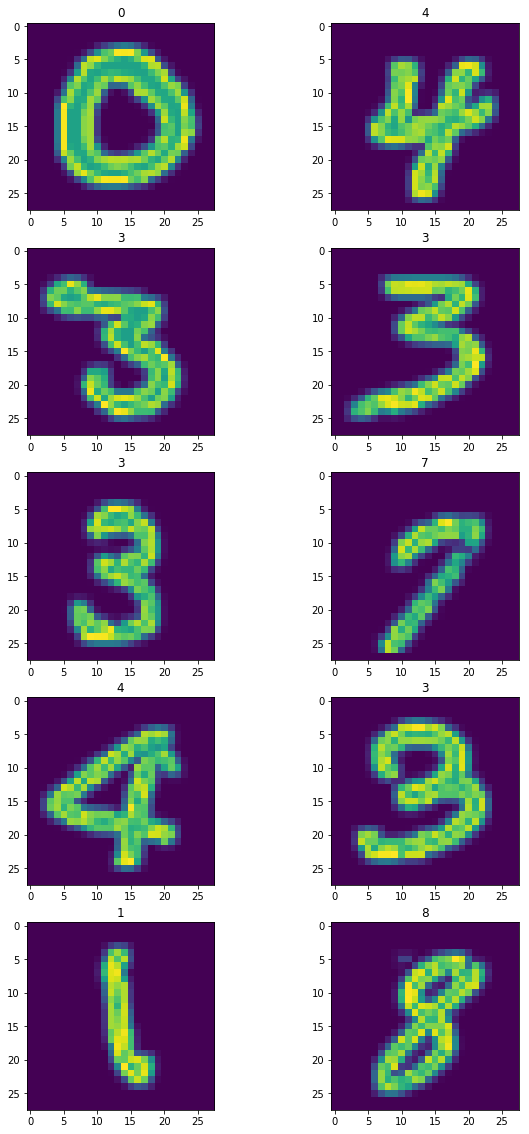

In [35]:
sample = df_train.sample(n=10,axis=0)
fig,ax = plt.subplots(5,2,figsize=(10,20))
for idx,data in enumerate(sample.as_matrix()):
    row = idx//2
    col = idx%2
    data = data.reshape(int(np.sqrt(len(data))),int(np.sqrt(len(data))))
    data = data.astype('float64')
    data2 = data.copy()
    data2[(data2>threshold_otsu(data2))] = 0
    data3 = sobel(data)
    data = data + data2 + data3
    ax[row,col].imshow(data)
    ax[row,col].set_title(y[sample.index[idx]])

In [9]:
class SharpeningTransformer(TransformerMixin):
    def __init__(self,nrows):
        self.nrows = nrows
    def fit(self,X,y=None,**kwargs):
        return self
    def transform(self,X,**kwargs):
        for idx,data in enumerate(X.iloc[range(0,self.nrows)].as_matrix()):
            size = int(np.sqrt(len(data)))
            data = data.reshape(size,size)
            data = data.astype('float64')
            data2 = data.copy()
            data2[(data2>threshold_otsu(data2))] = 0
            data3 = sobel(data)
            data = data + data2 + data3
            data = data.reshape(size*size)
            X.iloc[idx] = data
        return X

In [ ]:
class FeatureExtractorTransformer(TransformerMixin):
    def __init__(self):
        self.nrows = nrows
    def fit(self,X,y=None,**kwargs):
        return self
    def transform(self,X,**kwargs):
        df_dict = {}
        for idx,data in enumerate(X.iloc[range(0,self.nrows)].as_matrix()):
            size = int(np.sqrt(len(data)))
            data = data.reshape(size,size)
            data = data.astype('float64')
            cx,cy = ndi.center_of_mass(data)
            data = data.reshape(size*size)
#             cont = max(measure.find_contours(data,1),key=len)
            dist_2d = ndi.distance_transform_edt(data)
            ax[row,col].imshow(dist_2d, cmap='plasma', alpha=.2)
            ax[row,col].contour(dist_2d, cmap='plasma')
            ax[row,col].plot(cont[::,1],cont[::,0])
        return X

In [ ]:
data = SharpeningTransformer(nrows=nrows)

In [ ]:
data.transform(df_train)